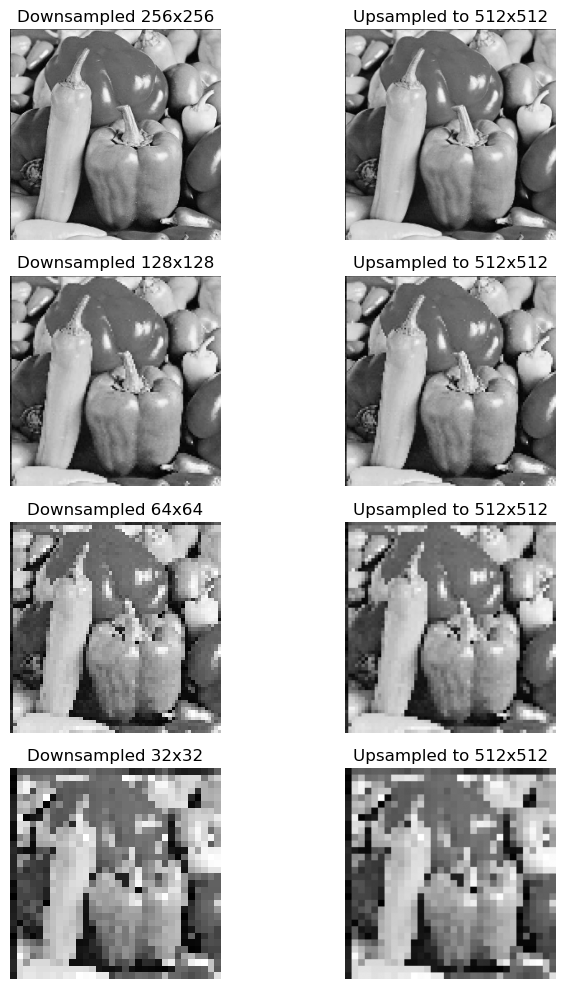

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def upscale(img, target_size=512):
    """Upscales an image using row and column duplication."""
    original_size = img.shape[0] 
    scale_factor = target_size // original_size  

    upsampled_img = np.repeat(np.repeat(img, scale_factor, axis=0), scale_factor, axis=1)
    
    return upsampled_img

downsampled_sizes = [256, 128, 64, 32]
downsampled_images = {}

for size in downsampled_sizes:
    img = cv2.imread(f"output_imgs/downsampled_{size}.png", cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"downsampled_{size}.png not found. Please check file paths.")
    downsampled_images[size] = img

upsampled_images = {size: upscale(img) for size, img in downsampled_images.items()}

plt.figure(figsize=(8, 10))

for i, size in enumerate(downsampled_sizes):
    # Plot original downsampled image
    plt.subplot(len(downsampled_sizes), 2, 2*i + 1)
    plt.imshow(downsampled_images[size], cmap='gray')
    plt.title(f"Downsampled {size}x{size}")
    plt.axis("off")

    # Plot upsampled image
    plt.subplot(len(downsampled_sizes), 2, 2*i + 2)
    plt.imshow(upsampled_images[size], cmap='gray')
    plt.title(f"Upsampled to 512x512")
    plt.axis("off")

plt.tight_layout()

plt.savefig("output_imgs/problem4.png")
plt.show()
